In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import bike_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = bike_prep()

In [5]:
# use samller dataset for increased speed
X_train = X_train[:1000]
X_test = X_test[:500]
y_train = y_train[:1000]
y_test = y_test[:500]

In [6]:
setting_dict = {"particles": 100,
                "epochs": 10,
                "batch_size": 50,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 10

In [7]:
import time
start_time = time.time()

In [8]:
mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor_extension(extend_model = "../models/bike/enkf_bike_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                                 additional_epochs = additional_epochs,
                                                                                 save_all = True,
                                                                                 verbose = 1)

Epoch 11. Training MSE: 10739.739, Test MSE: 12049.711.
Epoch 12. Training MSE: 10598.567, Test MSE: 11993.928.
Epoch 13. Training MSE: 10480.472, Test MSE: 11960.955.
Epoch 14. Training MSE: 10364.626, Test MSE: 11920.769.
Epoch 15. Training MSE: 10264.364, Test MSE: 11909.6.
Epoch 16. Training MSE: 10186.022, Test MSE: 11898.31.
Epoch 17. Training MSE: 10117.592, Test MSE: 11902.875.
Epoch 18. Training MSE: 10063.471, Test MSE: 11900.84.
Epoch 19. Training MSE: 10019.869, Test MSE: 11902.204.
Epoch 20. Training MSE: 9983.772, Test MSE: 11899.731.


In [9]:
end_time = time.time()
print("Calculation time: {} minutes.".format((end_time - start_time) / 60))

Calculation time: 11.425188100337982 minutes.


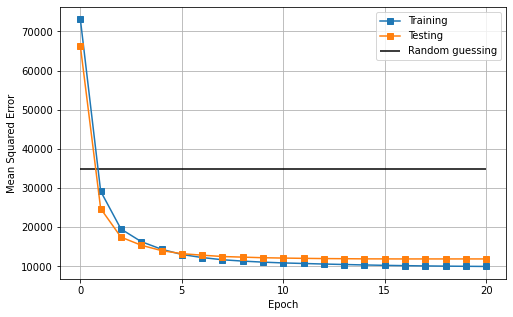

In [10]:
nn_plot_epoch_mse(mean_model_train_mse,
                  mean_model_test_mse,
                  mse_mean = mean_squared_error(y_train, np.ones(shape = (len(y_train),))*np.mean(y_train)),
                  savefig = True,
                  file = "../img/bike/enkf_bike_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [11]:
obj_dict = load_objects("../objects/bike/enkf_bike_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [12]:
final_model = nn_load("../models/bike/enkf_bike_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))